In [1]:
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch

from mogwai.data_loading import A3M_MSADataModule, parse_cf
from mogwai.models import GremlinPseudolikelihood
from mogwai.plotting import plot_colored_preds_on_trues
from mogwai.utils import apc

In [2]:
# Load msa
msa_dm = A3M_MSADataModule("../data/test/4rb6Y/4rb6Y.i90c75.a3m", batch_size=4096)
msa_dm.setup()

# Load contacts
true_contacts = parse_cf("../data/test/4rb6Y/4rb6Y.cf")

# Initialize model
model = GremlinPseudolikelihood(msa_dm.num_seqs, msa_dm.msa_length, msa_dm.msa_counts, true_contacts=torch.tensor(true_contacts))

# Initialize Trainer
trainer = pl.Trainer(min_steps=50, max_steps=50, gpus=1)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


MSA has shape (7569, 107, 20)



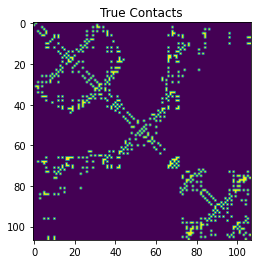

In [3]:
# Show info about family
print(f"MSA has shape {tuple(msa_dm.dims)}\n")

plt.imshow(true_contacts > 0.001)
plt.title("True Contacts")
plt.show()

In [4]:
# Train model
trainer.fit(model, msa_dm)


  | Name | Type | Params
------------------------------
Epoch 24: 100%|██████████| 2/2 [00:00<00:00,  4.55it/s, loss=88.013, v_num=6, auc=0.905, auc_apc=0.922, max_auc=0.901, delta_auc=0]


1

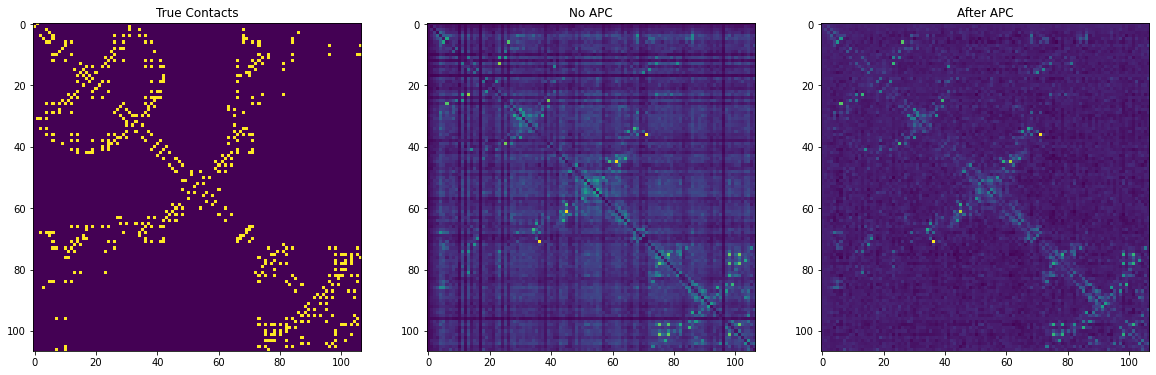

In [5]:
# Plot the contacts from the model

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.imshow(true_contacts > 0.005)
plt.title("True Contacts")

plt.subplot(132)
contacts = model.get_contacts()
plt.imshow(contacts)
plt.title("No APC")


plt.subplot(133)
plt.imshow(apc(contacts))
plt.title("After APC")
plt.show()

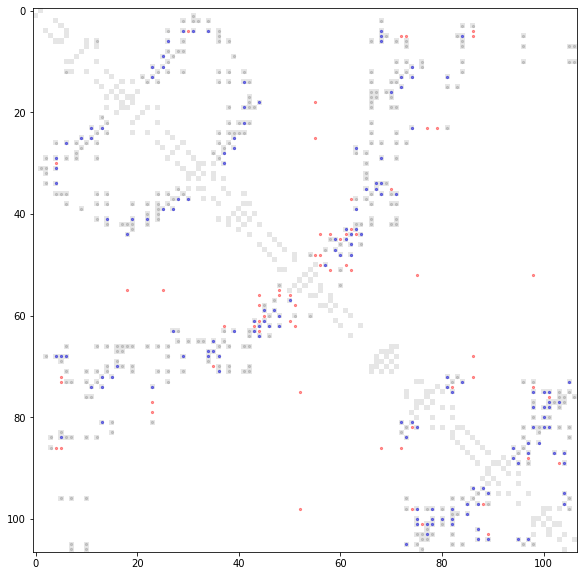

In [6]:
plt.figure(figsize=(10,10))
plot_colored_preds_on_trues(contacts, true_contacts > 0.001, point_size=5)
plt.show()